## <center>Лабораторна робота №2.</center > <center>Побудова та оцiнювання якостi моделей класифiкацiї та регресiї засобами бiблiотеки Scikit-Learn Python</center>

### Завдання 

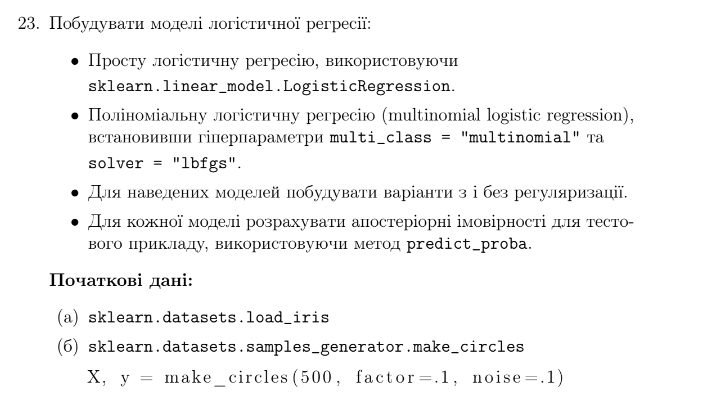

Спочатку імпортуємо усі модулі, методи та атрибути, з якими будемо далі працювати:

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

%matplotlib inline

### 1. Візуалізація даних

In [163]:
# формуємо набір даних, використовуючи метод make_circles()

X, y = make_circles(500, factor =.1 , noise =.1)

# об'єднуємо ознаки та цільову змінну у спільний DataFrame
df = pd.DataFrame(dict(X1=X[:, 0], X2=X[:, 1], y=y))
df

,X1,X2,y
0,-1.048365,-0.199594,0
1,-0.097628,0.040459,1
2,-1.025744,0.490507,0
3,0.109452,-0.007270,1
4,0.177033,0.094190,1
...,...,...,...
495,0.027941,-0.093953,1
496,0.268303,0.782900,0
497,-1.060476,-0.119698,0
498,-0.022712,-0.111751,1


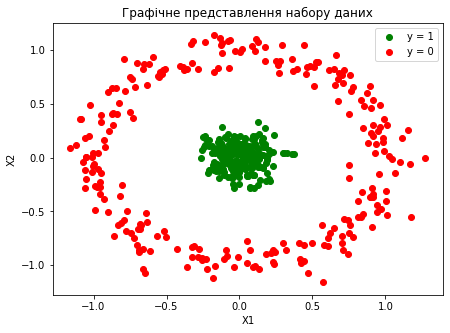

In [164]:
# візуалізація даних:

plt.figure(figsize=(7,5))
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='y = 1')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='y = 0')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Графічне представлення набору даних')
plt.legend()
plt.show()

### 2. Навчальна та валідаційна вибірки: розбиття

In [165]:
# використовуємо метод train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 3. Побудова моделей

In [166]:
# будуємо спочатку просту логістичну регресію та навчаємо її на навчальній множині

simple_lr = LogisticRegression()
simple_lr.fit(X_train, y_train)

LogisticRegression()

In [167]:
# і також поліноміальну та навчаємо її на навчальній множині

multi_lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')
multi_lr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

### 5. Прогнози на основі побудованих моделей

In [168]:
# прогнозування значень тестової множини на основі побудованих моделей

y_smpl_pred = simple_lr.predict(X_test)
y_mlt_pred = multi_lr.predict(X_test)

### 6. Оцінка перенавчання

Для цього оцінимо значення метрик, які ми отримали для навчальної вибірки та валідаційної.
У випадку, якщо значення метрик для навчальної вибірки значно перевищують значення для валідаційної, тоді
матиме місце перенавчання.

Порівнюючи результати критеріїв якості, наведених нижче, бачимо, що значення навчальної вибірки доволі перевищують за значення 
валідаційної вибірки, тому <b>висока ймовірність перенавчання</b>.
Аби усунути це, скористаємось далі процесом регуляризації.

### 7. Додаткові результати: обчислення апостеріорних ймовірностей

In [169]:
# для простої моделі

y_smpl_pred_prob = simple_lr.predict_proba(X_test)

In [170]:
# для поліноміальної моделі

y_mlt_pred_prob = multi_lr.predict_proba(X_test)

### 8. Розрахунок критеріїв якості

#### Критерії якості для навчальної вибірки

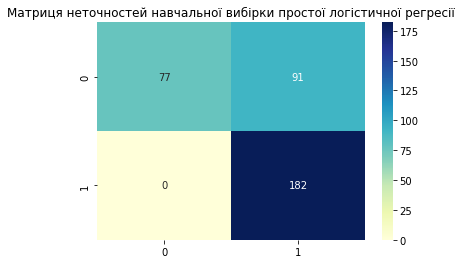

In [171]:
# матриця неточностей для простої моделі навчальної вибірки

y_pred_smpl_train = simple_lr.predict(X_train)
cnf_mtrx_train_smpl = metrics.confusion_matrix(y_train, y_pred_smpl_train)
ax = plt.axes()
sns.heatmap(pd.DataFrame(cnf_mtrx_train_smpl), annot=True, cmap="YlGnBu" ,fmt='g')
ax.set_title('Матриця неточностей навчальної вибірки простої логістичної регресії')
plt.show()

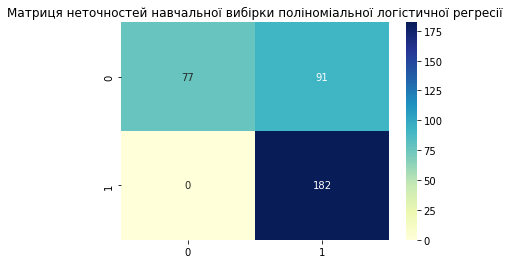

In [172]:
# матриця неточностей для поліноміальної моделі навчальної вибірки

y_pred_mlt_train = multi_lr.predict(X_train)
cnf_mtrx_train_mlt = metrics.confusion_matrix(y_train, y_pred_mlt_train)
ax = plt.axes()
sns.heatmap(pd.DataFrame(cnf_mtrx_train_mlt), annot=True, cmap="YlGnBu" ,fmt='g')
ax.set_title('Матриця неточностей навчальної вибірки поліноміальної логістичної регресії')
plt.show()

In [173]:
# Правильність(Accuracy), Точність(Precision), Повнота(Recall), F-міра(F1-score) навчальної вибірки

print('Для простої моделі:')
print(metrics.classification_report(y_train, y_pred_smpl_train), end='\n\n\n')
print('Для поліномільної моделі:')
print(metrics.classification_report(y_train, y_pred_mlt_train))

Для простої моделі:
              precision    recall  f1-score   support

           0       1.00      0.46      0.63       168
           1       0.67      1.00      0.80       182

    accuracy                           0.74       350
   macro avg       0.83      0.73      0.71       350
weighted avg       0.83      0.74      0.72       350



Для поліномільної моделі:
              precision    recall  f1-score   support

           0       1.00      0.46      0.63       168
           1       0.67      1.00      0.80       182

    accuracy                           0.74       350
   macro avg       0.83      0.73      0.71       350
weighted avg       0.83      0.74      0.72       350



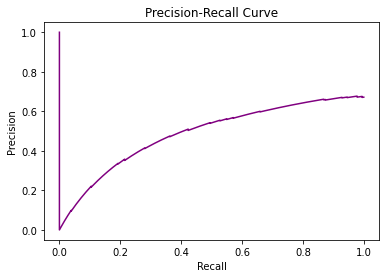

In [174]:
# PR-крива для навчальної вибірки
from sklearn.metrics import precision_recall_curve
y_pred_prob_train = simple_lr.predict_proba(X_train)
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_prob_train[:,1])

#create precision recall curve
fig, axx1 = plt.subplots()
axx1.plot(recall, precision, color='purple')

#add axis labels to plot
axx1.set_title('Precision-Recall Curve')
axx1.set_ylabel('Precision')
axx1.set_xlabel('Recall')

#display plot
plt.show()

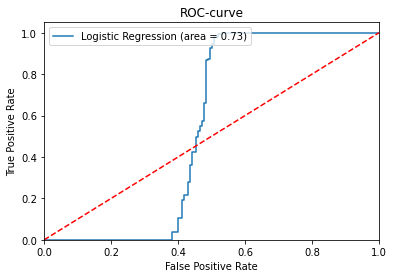

In [175]:
# ROC-крива для навчальної вибірки
logit_roc_auc = roc_auc_score(y_train, simple_lr.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, simple_lr.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend(loc="upper left")
plt.show()

#### Критерії якості для валідаційної вибірки

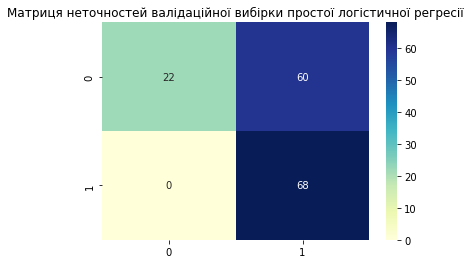

In [176]:
# матриця неточностей для простої моделі навчальної вибірки

cnf_mtrx_smpl = metrics.confusion_matrix(y_test, y_smpl_pred)
ax = plt.axes()
sns.heatmap(pd.DataFrame(cnf_mtrx_smpl), annot=True, cmap="YlGnBu" ,fmt='g')
ax.set_title('Матриця неточностей валідаційної вибірки простої логістичної регресії')
plt.show()

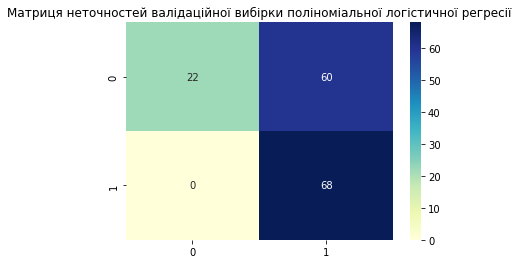

In [177]:
# матриця неточностей для простої моделі навчальної вибірки

cnf_mtrx_mlt = metrics.confusion_matrix(y_test, y_mlt_pred)
ax = plt.axes()
sns.heatmap(pd.DataFrame(cnf_mtrx_mlt), annot=True, cmap="YlGnBu" ,fmt='g')
ax.set_title('Матриця неточностей валідаційної вибірки поліноміальної логістичної регресії')
plt.show()

In [178]:
# Правильність(Accuracy), Точність(Precision), Повнота(Recall), F-міра(F1-score) валідаційної вибірки

print('Для простої моделі:')
print(metrics.classification_report(y_test, y_smpl_pred), end='\n\n\n')
print('Для поліномільної моделі:')
print(metrics.classification_report(y_test, y_mlt_pred))

Для простої моделі:
              precision    recall  f1-score   support

           0       1.00      0.27      0.42        82
           1       0.53      1.00      0.69        68

    accuracy                           0.60       150
   macro avg       0.77      0.63      0.56       150
weighted avg       0.79      0.60      0.55       150



Для поліномільної моделі:
              precision    recall  f1-score   support

           0       1.00      0.27      0.42        82
           1       0.53      1.00      0.69        68

    accuracy                           0.60       150
   macro avg       0.77      0.63      0.56       150
weighted avg       0.79      0.60      0.55       150



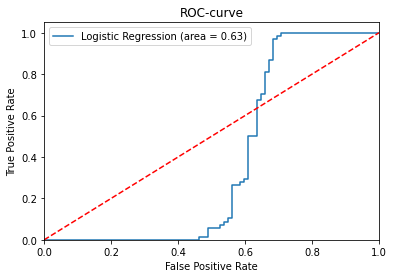

In [179]:
# ROC-крива для валідаційної вибірки
logit_roc_auc = roc_auc_score(y_test, simple_lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, simple_lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend(loc="upper left")
plt.show()

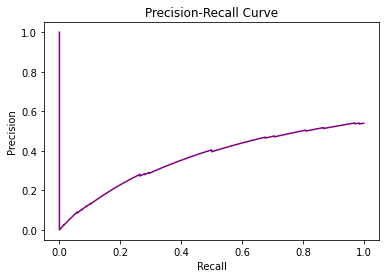

In [180]:
# PR-крива для валідаційної вибірки

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_smpl_pred_prob[:,1])

#create precision recall curve
fig, axx = plt.subplots()
axx.plot(recall, precision, color='purple')

#add axis labels to plot
axx.set_title('Precision-Recall Curve')
axx.set_ylabel('Precision')
axx.set_xlabel('Recall')

#display plot
plt.show()

### 9. Решітчастий пошук(GridSearch)

In [181]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

# решітчастий пошук для простої моделі
param_grid = {'C': np.logspace(-3,3,7)} 
gs_simple_lr = GridSearchCV(simple_lr, 
                     param_grid=param_grid,
                    scoring='accuracy',
                           cv=15)

gs_simple_lr.fit(X_train, y_train)
print("Найкраще значення гіперпараметра:", gs_simple_lr.best_params_)

Найкраще значення гіперпараметра: {'C': 1.0}


In [183]:
modified_simple_lr = LogisticRegression(C=gs_simple_lr.best_params_['C'])
modified_simple_lr.fit(X_train, y_train)
print('Правильність(Accuracy):', modified_simple_lr.score(X_test, y_test))
print(metrics.classification_report(y_test, modified_simple_lr.predict(X_test)))

Правильність(Accuracy): 0.6
              precision    recall  f1-score   support

           0       1.00      0.27      0.42        82
           1       0.53      1.00      0.69        68

    accuracy                           0.60       150
   macro avg       0.77      0.63      0.56       150
weighted avg       0.79      0.60      0.55       150



In [184]:
# решітчастий пошук для поліномфальної моделі
param_grid = {'C': np.logspace(-3,3,7)} 
gs_mlt_lr = GridSearchCV(multi_lr, 
                     param_grid=param_grid,
                    scoring='accuracy',
                           cv=15)

gs_mlt_lr.fit(X_train, y_train)
print("Найкраще значення гіперпараметра:", gs_mlt_lr.best_params_)

Найкраще значення гіперпараметра: {'C': 0.1}


In [185]:
modified_mlt_lr = LogisticRegression(C=gs_simple_lr.best_params_['C'])
modified_mlt_lr.fit(X_train, y_train)
print('Правильність(Accuracy):', modified_mlt_lr.score(X_test, y_test))
print(metrics.classification_report(y_test, modified_mlt_lr.predict(X_test)))

Правильність(Accuracy): 0.6
              precision    recall  f1-score   support

           0       1.00      0.27      0.42        82
           1       0.53      1.00      0.69        68

    accuracy                           0.60       150
   macro avg       0.77      0.63      0.56       150
weighted avg       0.79      0.60      0.55       150



### 10. Границі рішень(Decision Boundaries)

In [186]:
def plot_dataset(X, y, axes, figsize=(10,8), expand_plot_percent=1.2):
    if figsize is not None:
        plt.figure(figsize=figsize)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(np.array(axes)*expand_plot_percent)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

In [187]:
from sklearn.ensemble import RandomForestClassifier
def decision_bound(clf, axes, figsize=(10,8), X=None, y=None):
    axes = np.array(axes)*1.2
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_ = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_).reshape(x0.shape)
    plt.figure(figsize=figsize)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    if type(clf) not in [RandomForestClassifier]:
        y_decision = clf.decision_function(X_).reshape(x0.shape)
        plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    if X is not None and y is not None:
        plot_dataset(X,y,axes, None, 1)

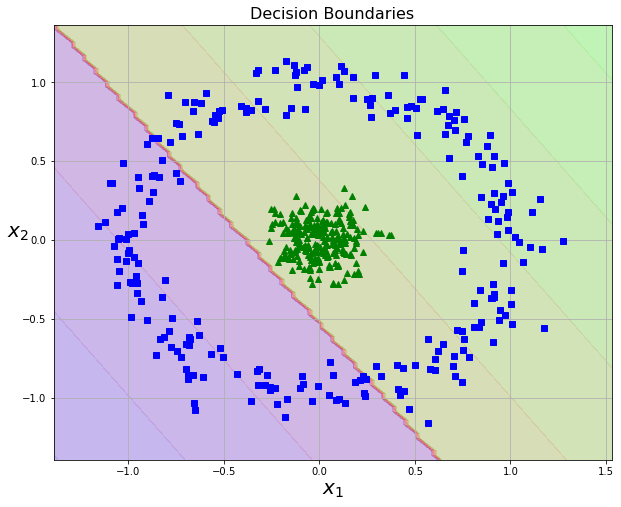

In [188]:
min_x0 = np.min(X[:,0])
max_x0 = np.max(X[:, 0])
min_x1 = np.min(X[:, 1])
max_x1 = np.max(X[:, 1])
axes = [min_x0, max_x0, min_x1, max_x1]
decision_bound(simple_lr, axes, X=X, y=y)
plt.title('Decision Boundaries', size=16)
plt.show()

### 11. Висновки про якість роботи моделей на вказаному наборі даних

Під час роботи з набором даних було побудовано 4 моделі:
  - проста логістична регресія;
  - поліноміальна логістична регресія;
  - проста логістична регресія з регуляризацією;
  - поліноміальна логістична регресія з регуляризацією.

Після навчання моделей на навчальній вибірці та обрахування значень різних критеріїв якості, ми отримали відносно
незадовільні результати. Аналізуючи числові значення метрик, бачимо, що в середньому всі вони нижче 0.6, а матриці
неточностей показали, що досить велика кількість прикладів була неправильно класифікована.
Зокрема, значення правильності на валідаційній вибірці для обох моделей становила 0.58.
Регуляризація допомогла знайти найкращі значення гіперпараметру, моделі були модифікані і знову навчені на навчальній
вибірці. Значення правильності та інших метрик незначно, але підвищилась, зокрема правильність становила 0.6.
Обидві моделі з регуляризацією можна вважати однаковими, адже давали ідентичні результати критеріїв якості.
Чому ж навіть регуляризація не підвищила ефективність моделі для даного набору даних і ми маємо такі незадовільні результати?

Відповідь досить коротка: <b>застосування логістичної регресії для цього набору даних є доволі поганим рішенням.</b>
Річ у тому, що логістичну регресію дуже добре застосовувати у випадку бінарної класифікації для даних, які є лінійно роздільними: можна провести пряму, яка буде розділяти два класи. Оскільки у моєму випадку дані представляють 2 концентричні кола, логістична регресія буде погано працювати. Це ми можемо прослідкувати навіть у пункті побудови границь рішень.
Для перевірки я вирішила використати дерева рішень для розв'язання задачі класифікації саме заданого набору і переконатись,
що ця модель буде краще працювати. Прослідкувати це можна у нижче наведеному коді:

Accuracy:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        68

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



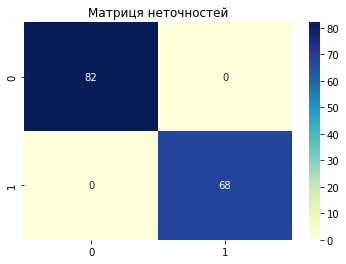

In [191]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)
print("Accuracy:",metrics.classification_report(y_test, y_pred_clf))
matrix = metrics.confusion_matrix(y_test, y_pred_clf)
ax = plt.axes()
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.set_title('Матриця неточностей')
plt.show()

Найкращою серед побудованих моделей можна вважати будь-яку з двох варіантів із регуляризацією, адже єдина відмінність полягає
у значення параметра multi_class, і як я вже переконалась, це не вплинуло на якість моделі.
Для зручності вважатимемо найкращою модель <b>modified_simple_lr</b>

### 12. Навчання моделі на підмножинах навчальної вибірки

In [192]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train, y_train, test_size = 0.1)
modified_simple_lr.fit(X_train_1, y_train_1)
y1 = modified_simple_lr.predict(X_test_1)
print('Accuracy: ',metrics.accuracy_score(y_test_1, y1))
print('Precision: ',metrics.precision_score(y_test_1, y1))
print('Recall: ',metrics.recall_score(y_test_1, y1))

Accuracy:  0.5714285714285714
Precision:  0.5161290322580645
Recall:  1.0


In [193]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train, y_train, test_size = 0.2)
modified_simple_lr.fit(X_train_2, y_train_2)
y2 = modified_simple_lr.predict(X_test_2)
print('Accuracy: ',metrics.accuracy_score(y_test_2, y2))
print('Precision: ',metrics.precision_score(y_test_2, y2))

Accuracy:  0.7285714285714285
Precision:  0.660377358490566


In [194]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_train, y_train, test_size = 0.3)
modified_simple_lr.fit(X_train_3, y_train_3)
y3 = modified_simple_lr.predict(X_test_3)
print('Accuracy: ',metrics.accuracy_score(y_test_3, y3))
print('Precision: ',metrics.precision_score(y_test_3, y3))

Accuracy:  0.6952380952380952
Precision:  0.6235294117647059


In [195]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_train, y_train, test_size = 0.4)
modified_simple_lr.fit(X_train_4, y_train_4)
y4 = modified_simple_lr.predict(X_test_4)
print('Accuracy: ',metrics.accuracy_score(y_test_4, y4))
print('Precision: ',metrics.precision_score(y_test_4, y4))

Accuracy:  0.7142857142857143
Precision:  0.6605504587155964


In [197]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_train, y_train, test_size = 0.5)
modified_simple_lr.fit(X_train_5, y_train_5)
y5 = modified_simple_lr.predict(X_test_5)
print('Accuracy: ',metrics.accuracy_score(y_test_5, y5))
print('Precision: ',metrics.precision_score(y_test_5, y5))

Accuracy:  0.6057142857142858
Precision:  0.5923076923076923
